# EDA Notebook
Please note: the purpose is the notebook is to perform inital EDA, data cleaning feature engineering on the `online_shoppers_intention.csv`. 

Once the dataframe is ready for modeling, it will be exported and used in the `draft_model_notebook.ipynb` notebook.

## Business Questions:
Does the proximity to a holiday determine whether or not a customer will purchase?
Do returning visitors have a higher revenue than one-time visitors?
What feature has the best and worst impact on revenue?

In [1]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# add import for Decision Treees
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

## 1. Loading `online_shoppers_intention.csv`

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.isna().sum()
# no missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
df.shape

(12330, 18)

## Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f8ba456d0>,
      dtype=object)

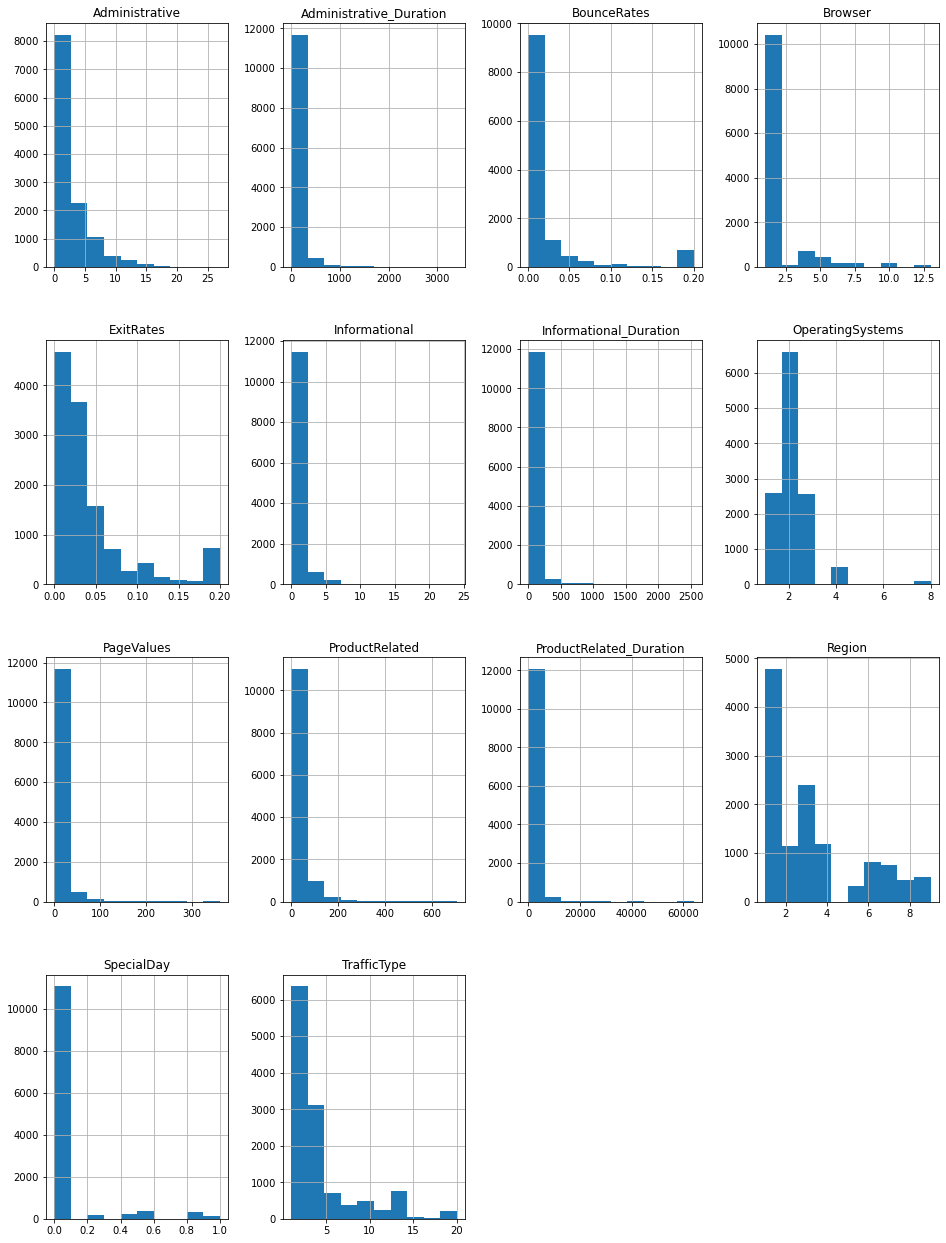

In [15]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(16,22))

In [16]:
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [17]:
(5768/12330)*100

46.78021086780211

#### 47% of site visitors did not visit administrative pages

#### The scatterplot below indicates no correlation between the Administrative and Administrative_Duration features.

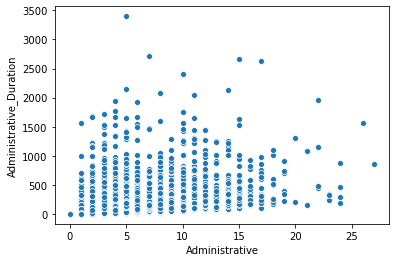

In [18]:
sns.scatterplot(data=df, x="Administrative", y="Administrative_Duration") 

In [20]:
df['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

In [21]:
(9699/12330)*100

78.661800486618

#### 79% of site visitors did not visit nformational pages.

#### The scatterplot below indicates no correlation between the Informational & Informational_Duration features.

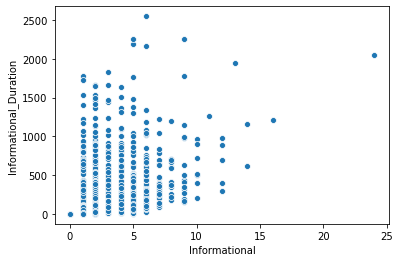

In [22]:
sns.scatterplot(data=df, x="Informational", y="Informational_Duration") 

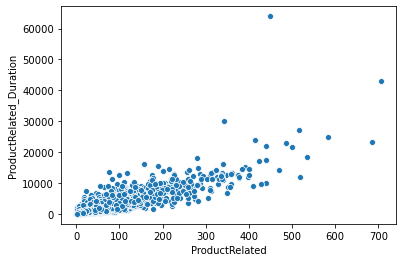

In [23]:
sns.scatterplot(data=df, x="ProductRelated", y="ProductRelated_Duration") 

#### The scatterplot indicates a positive correlation between the ProductRelated and ProductRelated_Duration variables.

#### We will investigate this further.

## Categorical Features

In [9]:
# (Sidney) 9 features
# EDA on 'SpecialDay' - 'Revenue'

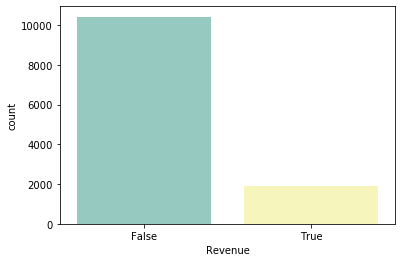

In [10]:
# checking class imbalance with the 'Revenue' target
sns.countplot(df['Revenue'], palette='Set3')

In [11]:
# checking the exact class imalance with the positive class
df.Revenue.sum() / len(df.Revenue)
# so our positive class is the minority

0.15474452554744525

This means that only 15.5% of site viewers in this dataset purchased the product.

Obviously this is a terrible purchase rate, so we want to investigate why this happened.

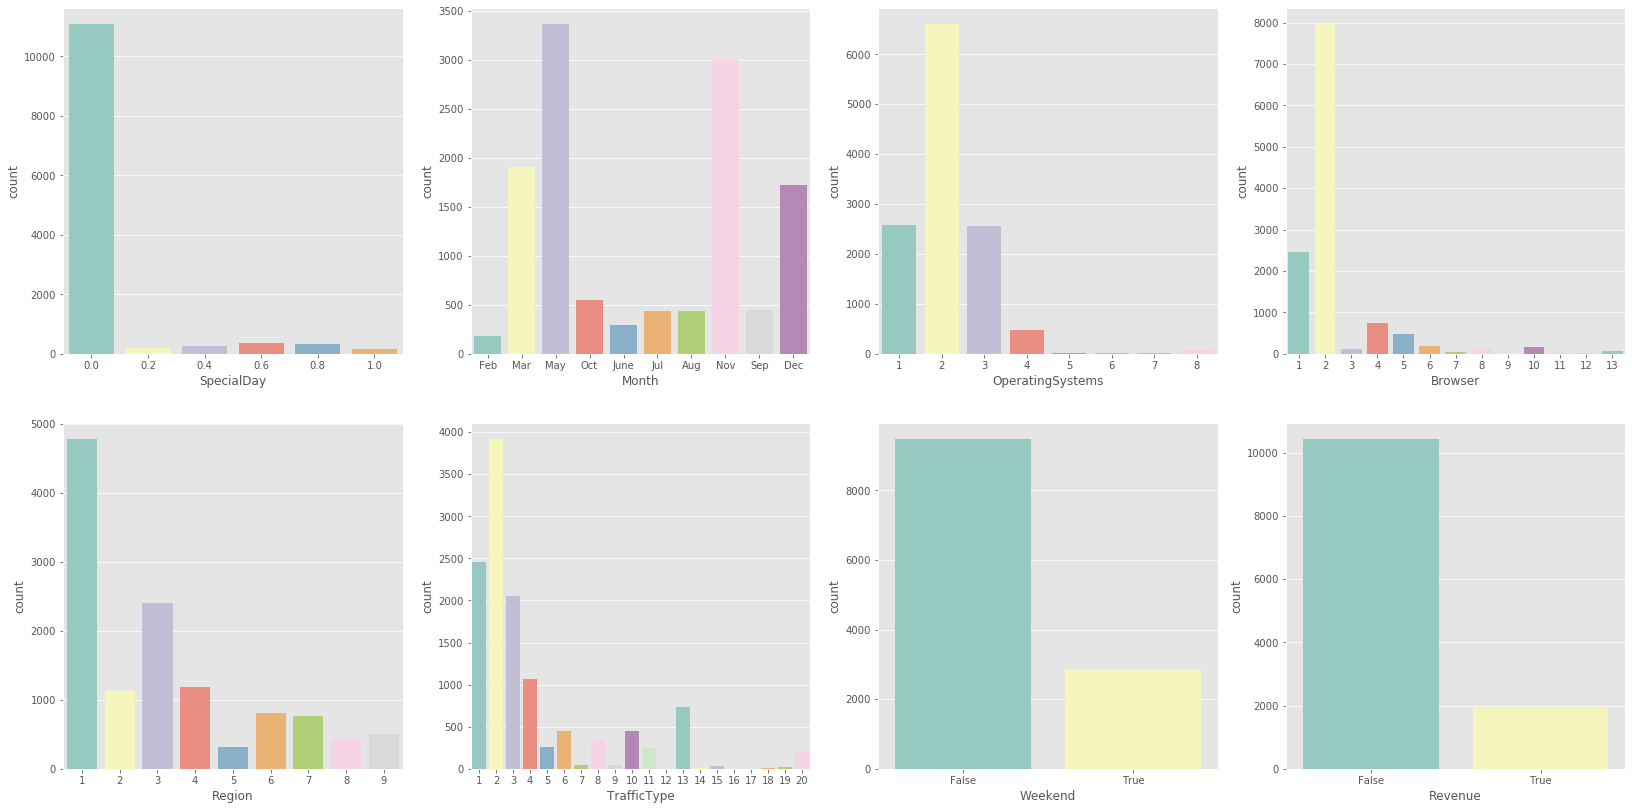

In [59]:
# checking frequency distribution for all categorical variables

fig, ax = plt.subplots(2,4, figsize=(28,14))
sns.countplot(df['SpecialDay'], ax=ax[0,0], palette='Set3')
sns.countplot(df['Month'], ax=ax[0,1], palette='Set3')
sns.countplot(df['OperatingSystems'], ax=ax[0,2], palette='Set3')
sns.countplot(df['Browser'], ax=ax[0,3], palette='Set3')
sns.countplot(df['Region'], ax=ax[1,0],palette='Set3')
sns.countplot(df['TrafficType'], ax=ax[1,1],palette='Set3')
sns.countplot(df['Weekend'], ax=ax[1,2],palette='Set3')
sns.countplot(df['Revenue'], ax=ax[1,3],palette='Set3')
fig.show()

Observations:
- `SpecialDay`:
- `Month`: Most entries are in the March, May, November and December months
- `OperatingSystems`:
- `Browser`: A majority of people use browser type 2, but we don't know what that is
- `Region`: Although it looks like the site gets traffic from 9 different regions, '1' has the most
- `TrafficType`: Again, it's hard to interpret this without a legend for the values
- `Weekend`: There's an obvious class imalance here because there are 5 weekdays. We can look more closely on how Weekend interacts with the numerical data
- `Revenue`: Class imalance of 85% for the negative class

In [44]:
df.Browser.unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11])

In [43]:
df.OperatingSystems.unique()

array([1, 2, 4, 3, 7, 6, 8, 5])

In [45]:
df.TrafficType.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

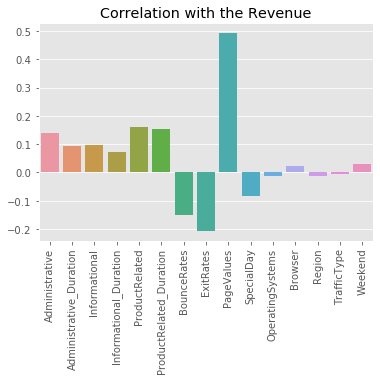

In [54]:
# Correlation with Revenue
data_corr = df.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)

From this graph, we can see that PageValues has the highest correlation (around 0.5) with Revenue, compared to other features.

In [60]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


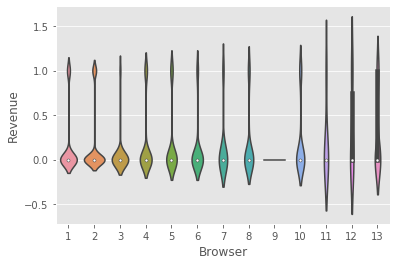

In [62]:
sns.violinplot(data = df, x='Browser', y='Revenue')

## 3. Feature Engineering

In [46]:
# dummying the categorical variables

# df = pd.get_dummies(df,columns=['SpecialDay', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])

## Export Finished Dataframe

In [ ]:
# df.to_csv('cleaned_eda_data.csv')